## Problem Statement

### H1N1_Vaccine_prediction

Our target to predict is to wheather a person is vaccinated by  h1n1_vaccine or not.

### Data Attributes

1.unique_id
2.h1n1_worry:Level of concern about the H1N1 flu.
             0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
3.h1n1_awareness : level of knowledge about H1N1 flu.0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
4.antiviral_medication
5.contact_avoidance
6.bought_face_mask
7.wash_hands_frequently
8.avoid_large_gatherings
9.reduced_outside_home_cont
10.avoid_touch_face
11.dr_recc_h1n1_vacc
12.dr_recc_seasonal_vacc
13.chronic_medic_condition
14.cont_child_undr_6_mnths
15.is_health_worker
16.has_health_insur
17.is_h1n1_vacc_effective
18. is_h1n1_risky
19.sick_from_h1n1_vacc
20.is_seas_vacc_effective
21.is_seas_risky
22.sick_from_seas_vacc
23.age_bracket 
24.qualification: Self-reported education level.1 = < 12 Years; 2 = 12 Years; 3 = Some College; 4 = College Graduate
25.race
26.sex 
26.income_level
27.marital_status
28.housing_status
29. employment
30.census_msa
31.no_of_adults
32.no_of_children
33.h1n1_vaccine

### Importing Essential Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

### Load the Dataset

In [52]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [53]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [54]:
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [55]:
df.shape

(26707, 34)

In [56]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [58]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [59]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [60]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [61]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

### Data Preprocessing 


In [ ]:
###Dealing with null values

In [62]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [63]:
df['h1n1_worry'].fillna(df['h1n1_worry'].mode()[0], inplace=True)
df['h1n1_awareness']=df['h1n1_awareness'].fillna('0') 
df['antiviral_medication']=df['antiviral_medication'].fillna('0') 
df['contact_avoidance']=df['contact_avoidance'].fillna('0') 
df['bought_face_mask']=df['bought_face_mask'].fillna('0') 
df['wash_hands_frequently']=df['wash_hands_frequently'].fillna('0') 
df['avoid_large_gatherings']=df['avoid_large_gatherings'].fillna('0') 
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].fillna('0') 
df['avoid_touch_face']=df['avoid_touch_face'].fillna('0') 
df['dr_recc_h1n1_vacc']=df['dr_recc_h1n1_vacc'].fillna('0') 
df['dr_recc_seasonal_vacc']=df['dr_recc_seasonal_vacc'].fillna('0') 
df['chronic_medic_condition']=df['chronic_medic_condition'].fillna('0')
df['cont_child_undr_6_mnths']=df['cont_child_undr_6_mnths'].fillna('0') 
df['is_health_worker']=df['is_health_worker'].fillna('0') 
df['has_health_insur']=df['has_health_insur'].fillna('0') 
df['is_h1n1_vacc_effective']=df['is_h1n1_vacc_effective'].fillna('0') 
df['is_seas_risky']=df['is_seas_risky'].fillna('0')
df['sick_from_h1n1_vacc']=df['sick_from_h1n1_vacc'].fillna('0')
df['is_seas_vacc_effective']=df['is_seas_vacc_effective'].fillna('0')
df['is_h1n1_risky']=df['is_h1n1_risky'].fillna('0')
df['sick_from_seas_vacc']=df['sick_from_seas_vacc'].fillna('0')
df['qualification']=df['qualification'].fillna('0')
df['income_level']=df['income_level'].fillna('0')
df['marital_status']=df['marital_status'].fillna('0')
df['housing_status']=df['housing_status'].fillna('0')
df['employment']=df['employment'].fillna('0')
df['no_of_adults']=df['no_of_adults'].fillna('0')
df['no_of_children']=df['no_of_children'].fillna('0')

In [64]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

### Explolatary Data Analysis

Data Visualiization

array([[<AxesSubplot:title={'center':'unique_id'}>,
        <AxesSubplot:title={'center':'h1n1_worry'}>],
       [<AxesSubplot:title={'center':'h1n1_vaccine'}>, <AxesSubplot:>]],
      dtype=object)

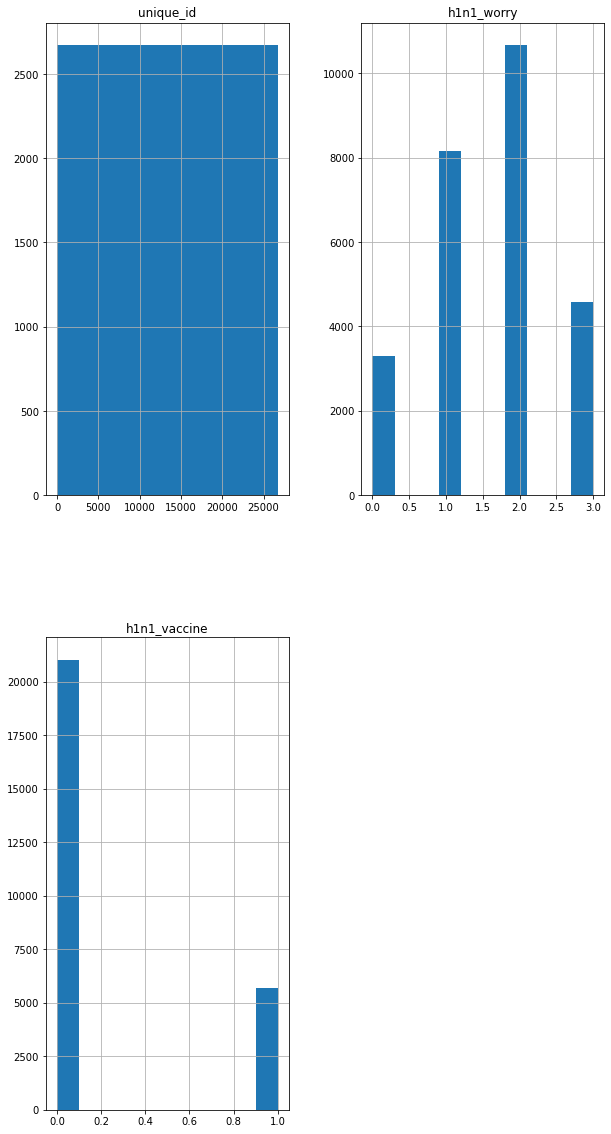

In [65]:
df.hist(figsize=(10,20))

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

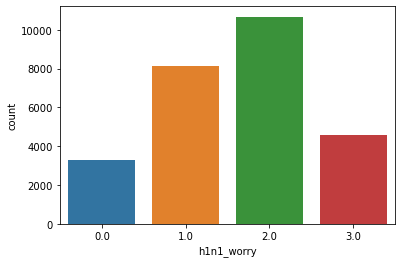

In [66]:
sns.countplot(x="h1n1_worry" ,data=df)

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

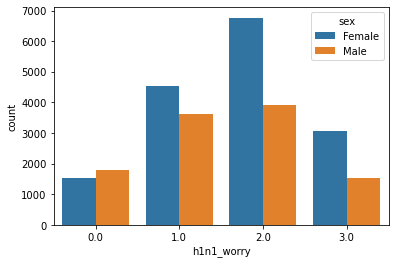

In [67]:
sns.countplot(x="h1n1_worry",hue="sex",data=df)

In [68]:
pd.crosstab(df['h1n1_awareness'],df["sex"])

sex,Female,Male
h1n1_awareness,,
0.0,1354,1152
1.0,8402,6196
2.0,6046,3441
0,56,60


In [69]:
pd.pivot_table(df,'employment',index=['qualification','sex'],columns=['marital_status'])

Empty DataFrame
Columns: []
Index: [(0, Female), (0, Male), (12 Years, Female), (12 Years, Male), (< 12 Years, Female), (< 12 Years, Male), (College Graduate, Female), (College Graduate, Male), (Some College, Female), (Some College, Male)]

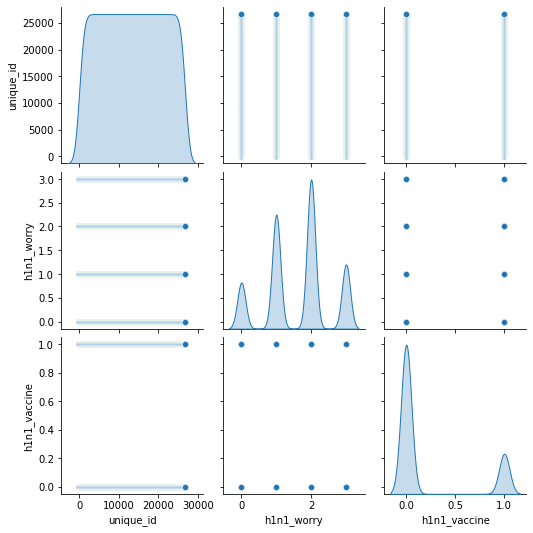

In [70]:
sns.pairplot(df,diag_kind='kde')

In [71]:
correlation=df.corr()
correlation

,unique_id,h1n1_worry,h1n1_vaccine
unique_id,1.000000,0.017896,-0.003280
h1n1_worry,0.017896,1.000000,0.121574
h1n1_vaccine,-0.003280,0.121574,1.000000


<AxesSubplot:>

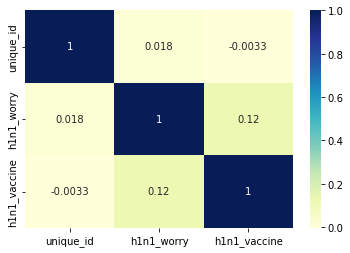

In [72]:
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

### Data Cleaning

In [73]:
df.drop(['unique_id','contact_avoidance','bought_face_mask','avoid_touch_face','race','marital_status','housing_status','income_level','wash_hands_frequently'], axis=1,inplace=True)

In [74]:
df.drop(['age_bracket','qualification','employment','sex','census_msa'],axis=1,inplace=True)

In [75]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness                object
antiviral_medication          object
avoid_large_gatherings        object
reduced_outside_home_cont     object
dr_recc_h1n1_vacc             object
dr_recc_seasonal_vacc         object
chronic_medic_condition       object
cont_child_undr_6_mnths       object
is_health_worker              object
has_health_insur              object
is_h1n1_vacc_effective        object
is_h1n1_risky                 object
sick_from_h1n1_vacc           object
is_seas_vacc_effective        object
is_seas_risky                 object
sick_from_seas_vacc           object
no_of_adults                  object
no_of_children                object
h1n1_vaccine                   int64
dtype: object

In [76]:
df1=df.duplicated(keep=False)
df1.count()

26707

### Split Data 

In [77]:
X=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [79]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8469027495453086
0.8473730188443779


Accuracy scores

predictions=model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8473730188443779

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.9912806247994008
0.7733682765506052


In [92]:
from sklearn.ensemble import BaggingClassifier

In [94]:
model3=BaggingClassifier(n_estimators=20,max_features=5,base_estimator=model1)
model3.fit(X_train,y_train) 
print(model3.score(X_train,y_train))
print(model.score(X_test,y_test))

0.798812453193538
0.7801073255959067


In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
model4=AdaBoostClassifier(n_estimators=20,base_estimator=model3)
model4.fit(X_train,y_train)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.9017331764202418
0.8496193685261451


In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
model5=GradientBoostingClassifier(n_estimators=50)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.8493634321172568
0.8496193685261451


In [101]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
model6=RandomForestClassifier(n_estimators=10,max_features=3)
model6.fit(X_train,y_train)
print(model6.score(X_train,y_train))
print(model6.score(X_test,y_test))


0.9774794051567348
0.8372644452764259


In [102]:
from sklearn.svm import SVC
model7=SVC(C=1.0,kernel='rbf', gamma='scale') 
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

0.8497913769123783
0.8531136902533383


Conclusion:

I used Logistic regresssion,DecisionTreeClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,SVC Algorithmds to check accuracy score.
from all the above RandomForestClassifier gives high Accuracy Score.